# 시험연습

Adult(hard) 또는 Wine(easy) 데이터셋 사용
테스트 분류 정확도 95%이상 나오는 모델을 찾으세요.

- 테스트셋이 따로 분리안되있으면 25% 테스트 셋으로 사용
- 테스트셋의 클래스가 균등하게 나뉘어져야 합니다.
- Adult : 2진 분류 - 연소득 5천만원 이상/이하
- WIne : 원산지 1,2,3 분류
- 첫번째 컬럼이 원산지입니다.

- KW(예측/분류), Linear Regression(예측), Logistic Regression(분류)
- Decision Tree(예측/분류), Random Forest, Gradient Boost Decision Tree, AdaBoot,
- S/W(S/M-C 분류용/SW-R(예측용), MLP(뉴럴네트워크))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [2]:
df = pd.read_csv('wine.data',index_col=0, header=None)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.columns = ['Alcohol','Malic acid','Ash','Alcalinity of ash' ,'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
'Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [4]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.groupby(0).describe()

Alcohol                                                             \
    count       mean       std    min     25%     50%     75%    max   
0                                                                      
1    59.0  13.744746  0.462125  12.85  13.400  13.750  14.100  14.83   
2    71.0  12.278732  0.537964  11.03  11.915  12.290  12.515  13.86   
3    48.0  13.153750  0.530241  12.20  12.805  13.165  13.505  14.34   

  Malic acid            ... OD280/OD315 of diluted wines       Proline  \
       count      mean  ...                          75%   max   count   
0                       ...                                              
1       59.0  2.010678  ...                         3.42  4.00    59.0   
2       71.0  1.932676  ...                         3.16  3.69    71.0   
3       48.0  3.333750  ...                         1.82  2.47    48.0   

                                                                  
          mean         std    min    25%     50%     75%     max  
0                                                                 
1  1115.711864  221.520767  680.0  987.5  1095.0  1280.0  1680.0  
2   519.507042  157.211220  278.0  406.5   495.0   625.0   985.0  
3   629.895833  115.097043  415.0  545.0   627.5   695.0   880.0  

[3 rows x 104 columns]

In [7]:
df.dtypes

Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [8]:
df.isna().sum().sum()  # Nan 확인!!

0

In [9]:
df.cov() #상관관계

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185
Malic acid,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867
Ash,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739
Alcalinity of ash,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345
Magnesium,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700
Total phenols,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057
Flavanoids,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492
Nonflavanoid phenols,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586
Proanthocyanins,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334
Color intensity,1.028283,0.644838,0.164654,0.145024,6.620521,-0.079998,-0.399169,0.040121,-0.033504,5.374449,-0.276506,-0.705813,230.767480


In [10]:
#X와 y를 분리
X = df.iloc[:,:]
y = df.index

In [11]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
y

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name=0, length=178)

In [13]:
X.shape, y.shape

((178, 13), (178,))

In [14]:
test_ratio = 0.25
test_m = int(len(X)*test_ratio)
test_m
m = len(X)

X_test = X[:test_m]
X_train = X[test_m:]
y_test = y[:test_m]
y_train = y[test_m:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((133, 13), (133,), (45, 13), (45,))

In [16]:
#model, Linear Regression, 가중치를 작게 제약시킨다. → 모든 정보를 활용해서 예측
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
ri = Ridge(normalize=True, solver='lsqr').fit(X_train,y_train)

In [17]:
ri.score(X_train, y_train), ri.score(X_test, y_test)

(0.8321226406967704, 0.8019556177441778)

In [18]:
y_test

Int64Index([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
            2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
            3],
           dtype='int64', name=0)

In [19]:
y_train

Int64Index([1, 2, 2, 3, 1, 2, 1, 1, 3, 3,
            ...
            2, 2, 2, 3, 1, 2, 2, 1, 2, 2],
           dtype='int64', name=0, length=133)

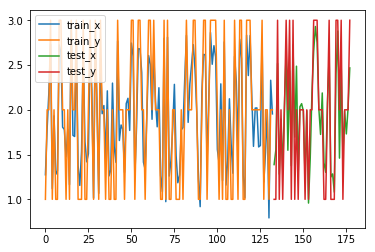

In [44]:
#예측을 그래프로 시각화
train_len = np.arange(len(X_train))
test_len = np.arange(len(X_train), len(X_train) + len(X_test))
plt.plot(train_len, ri.predict(X_train), label='train_x')
plt.plot(train_len, y_train, label='train_y')
plt.plot(test_len, ri.predict(X_test), label='test_x')
plt.plot(test_len, y_test, label='test_y')
plt.legend()

In [47]:
df.index.unique()

Int64Index([1, 2, 3], dtype='int64', name=0)

In [55]:
df_hot = pd.get_dummies(df)  

In [59]:
df_hot.head()  # 숫자는 get_dummies로 해도 조합이 안된다.

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [60]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
dt.score(X_train,y_train), dt.score(X_test,y_test)

(1.0, 0.9555555555555556)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
gb = GradientBoostingClassifier().fit(X_train, y_train)
gb.score(X_train,y_train), gb.score(X_test,y_test)

(1.0, 0.9555555555555556)

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=10).fit(X_train, y_train)
rf.score(X_train,y_train), rf.score(X_test,y_test)

(1.0, 1.0)

In [64]:
from sklearn.neural_network import MLPClassifier
mp = MLPClassifier(hidden_layer_sizes=(50,50)).fit(X_train, y_train)
mp.score(X_train, y_train), model.score(X_test, y_test)

(0.6165413533834586, 1.0)

In [65]:
from sklearn.model_selection import train_test_split


dt = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

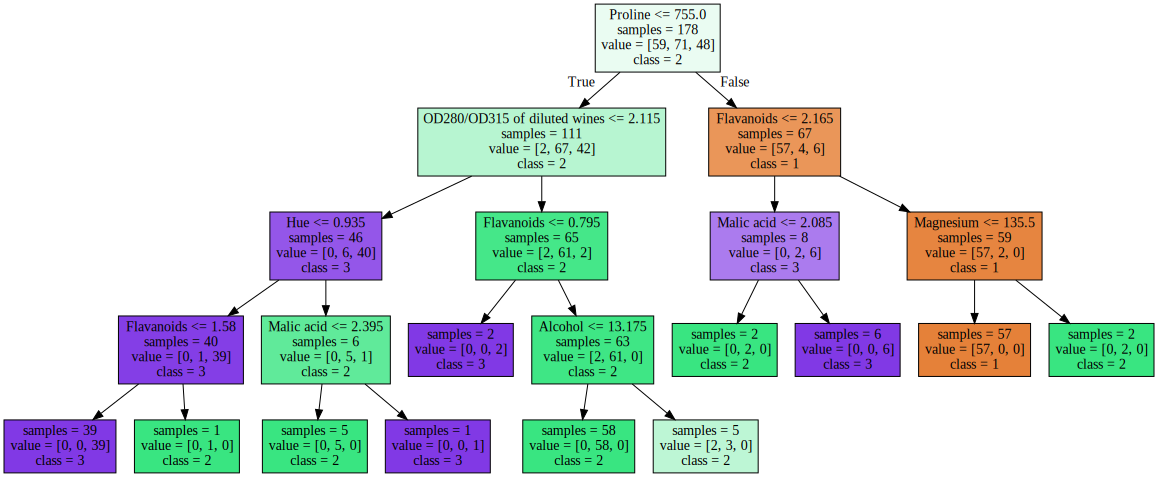

In [66]:
export_graphviz(model, out_file ='wine.dot', class_names=['1','2','3'], feature_names=X.columns, impurity=False, filled=True)
with open('wine.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [34]:
import matplotlib.pyplot as plt
df.target_names = ['1','2','3']
#plt.barh(X.feature_names, dt.feature_importances_)

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
